In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\Yash\\OneDrive\\Desktop\\Datasets and completed analysis\\Datasets\\Student Linear Regression\\StudentsPerformance[1].csv")

In [4]:
y = df['writing score']
X = df.drop('writing score', axis=1)

In [5]:
categorical_cols = X.select_dtypes(include=['object']).columns

In [6]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = model.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 3.07
Mean Squared Error (MSE): 13.84
R-squared (R²): 0.95


In [13]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred, 2)})
print("\n--- Sample of Predictions vs. Actual Scores ---")
print(comparison_df.head())


--- Sample of Predictions vs. Actual Scores ---
     Actual  Predicted
521      84      88.62
737      73      66.77
740      72      73.44
660      73      71.39
411      78      79.83


# Visualization

Text(0, 0.5, 'Frequency')

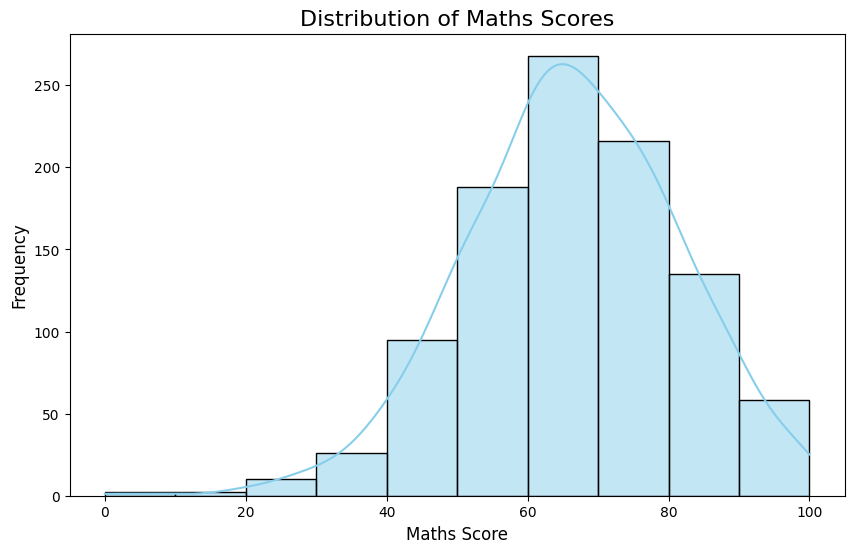

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['math score'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Maths Scores', fontsize=16)
plt.xlabel('Maths Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Analysis
Highest Performance: Group E achieved the highest average writing score among all the groups.

High Performance: Group D shows the second-highest average score, performing nearly as well as Group E.

Average Performance: Group C and Group B have similar scores that fall in the middle of the range.

Lowest Performance: Group A has the lowest average writing score in this comparison.

Key Insight: The chart demonstrates a clear disparity in writing scores among different ethnic groups in this dataset, suggesting that a student's background may be a factor in their academic performance.

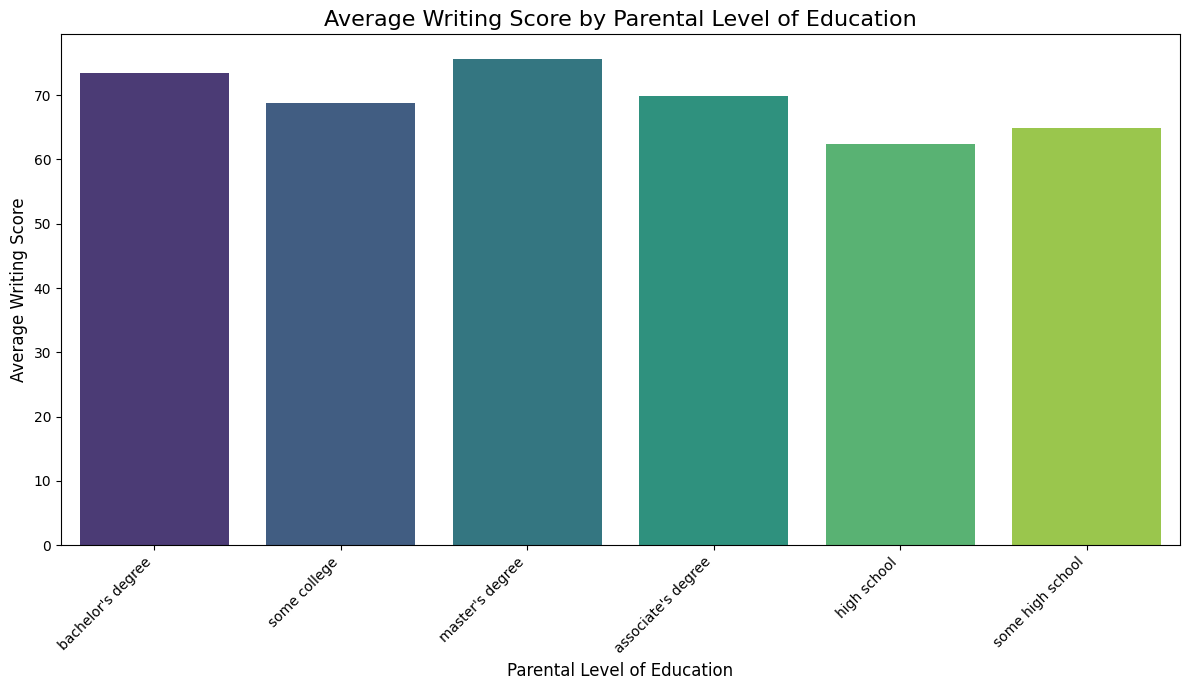

In [17]:
plt.figure(figsize=(12, 7))
sns.barplot(x='parental level of education', y='writing score', data=df,hue='parental level of education', palette='viridis', errorbar=None, legend=False)
plt.title('Average Writing Score by Parental Level of Education', fontsize=16)
plt.xlabel('Parental Level of Education', fontsize=12)
plt.ylabel('Average Writing Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Analysis

Gender Disparity: The chart shows a noticeable difference in average writing scores between female and male students.

Higher Performance: Female students, on average, achieve higher writing scores than their male counterparts.

Key Insight: This suggests that gender is a factor influencing writing performance within this dataset, with female students outperforming male students on average.

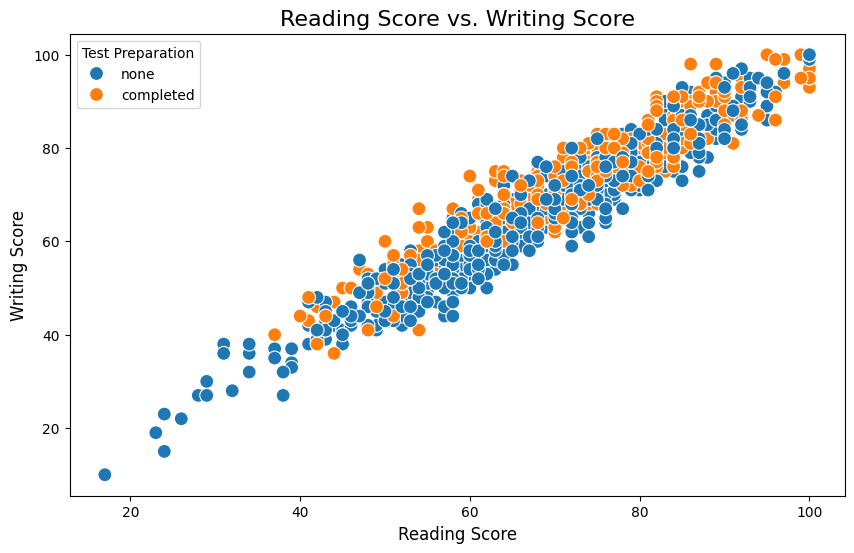

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reading score', y='writing score', hue='test preparation course', data=df, s=100)
plt.title('Reading Score vs. Writing Score', fontsize=16)
plt.xlabel('Reading Score', fontsize=12)
plt.ylabel('Writing Score', fontsize=12)
plt.legend(title='Test Preparation')

# Analysis
Course Impact: The chart shows a clear difference in average writing scores based on whether a student completed a test preparation course.

Higher Performance: Students who completed the course achieved a significantly higher average writing score than those who did not.

Key Insight: This strongly suggests that the test preparation course is effective, as completing it correlates with better performance in writing.